# ПРИЗНАКИ

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv(r'HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Задание 2) Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [6]:
stats_for_df = df.describe().loc[['mean', '50%', 'min', 'max', 'std'],:]

In [7]:
new_ind = list(stats_for_df.index) + ['mode']

In [8]:
mode_str = {}
for col in stats_for_df.columns:
    mode_str[col] = df[col].mode()[0]

In [9]:
stats_for_df = stats_for_df.append(mode_str, ignore_index=True).copy()

<ipython-input-9-500dd88d3bf1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_for_df = stats_for_df.append(mode_str, ignore_index=True).copy()


In [10]:
stats_for_df.index = new_ind

In [11]:
stats_for_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000


# Задание 3) Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные

In [13]:
df_new = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


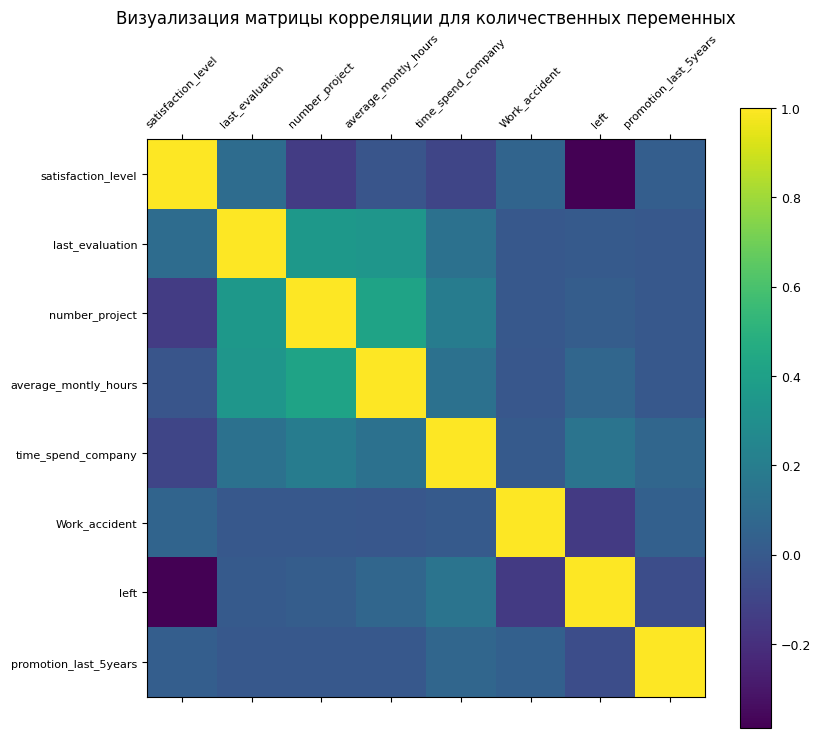

In [20]:
f = plt.figure(figsize=(9, 8))
plt.matshow(df_new.corr(), fignum=f.number)
plt.xticks(range(df_new.shape[1]), df_new.columns, fontsize=8, rotation=45)
plt.yticks(range(df_new.shape[1]), df_new.columns, fontsize=8)
plt.title("Визуализация матрицы корреляции для количественных переменных")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=9)

Вывод:
___
Самые скоррелированные переменные:

average_monthly_hours - Среднее количество часов на рабочем месте в месяц

number_projects - Количество проектов, выполненных за время работы
___

Наименее скоррелированные переменные:

satisfaction_level - Уровень удовлетворенности работой

left - уволился ли сотрудник

# Задание 4) Рассчитайте сколько сотрудников работает в каждом департаменте.


In [23]:
df.department.value_counts() # одна запись - это 1 человек

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

#Задание 5) Показать распределение сотрудников по зарплатам.

<Axes: xlabel='salary', ylabel='count'>

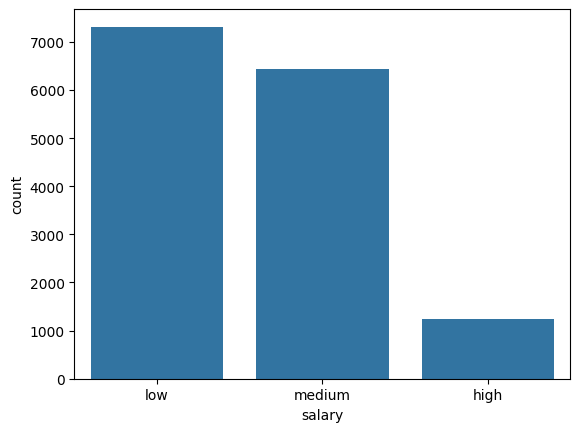

In [24]:
sns.countplot(x="salary", data=df)

# Задание 6) Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности


In [26]:
df.pivot_table(index='department', columns='salary', aggfunc='size')

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


<Axes: xlabel='salary', ylabel='count'>

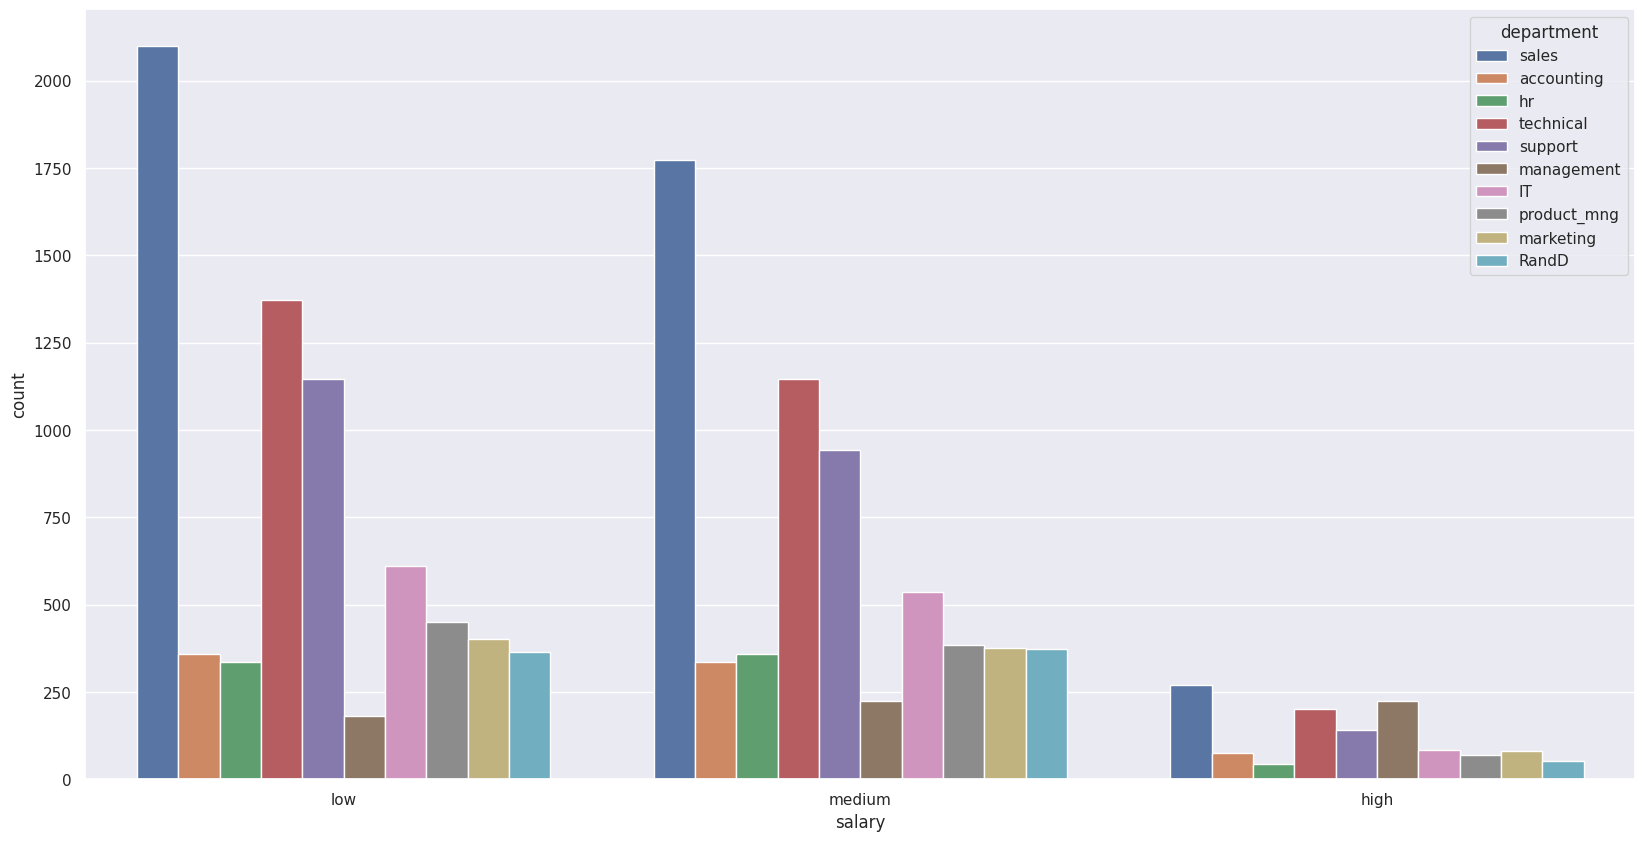

In [27]:
#Графически
sns.set(rc={"figure.figsize":(20, 10)})

sns.countplot(x="salary", data=df, hue='department')

# Задание 7) Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


In [29]:
print('Среднее количество рабочих часов сотрудников c низким окладом', df[df.salary == 'low']['average_montly_hours'].mean())
print('Среднее количество рабочих часов сотрудников с высоким окладом', df[df.salary == 'high']['average_montly_hours'].mean())
#0 гипотеза : в среднем проведенное на работе время одинаково для всех

Среднее количество рабочих часов сотрудников c низким окладом 200.9965828321487
Среднее количество рабочих часов сотрудников с высоким окладом 199.86742118027485


<Axes: >

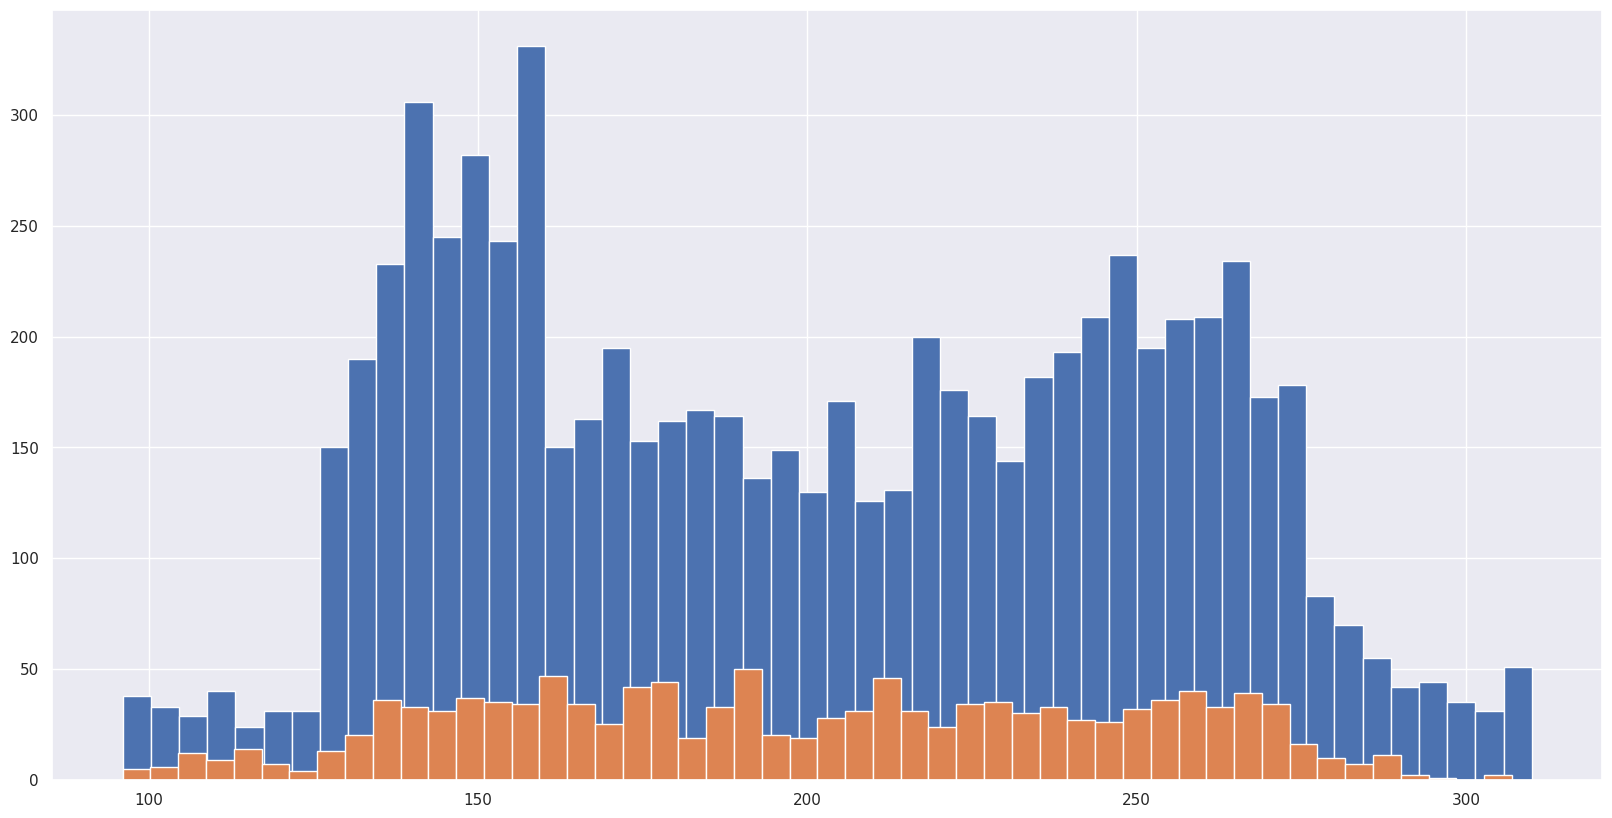

In [33]:
df_low_salary_time = df.loc[df.salary == 'low', 'average_montly_hours']
df_high_salary_time = df.loc[df.salary == 'high', 'average_montly_hours']

df_low_salary_time.hist(bins = 50)
df_high_salary_time.hist(bins = 50)

In [34]:
# T-test Стьюдента
print(f't_statistic = {ttest_ind(df_low_salary_time, df_high_salary_time)[0]}')
print(f'p_value = {ttest_ind(df_low_salary_time, df_high_salary_time)[1]}')

t_statistic = 0.7288680398062308
p_value = 0.4661023478267259


Вывод: так как p_value > 0.05, принимаем нулевую гипотезу о равенстве средних для данных двых выборок.
Следовательно, сотрудники с высоким окладом проводят на работе НЕ БОЛЬШЕ времени, чем сотрудники с низким окладом

# Задание 8) Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
## ● Доля сотрудников с повышением за последние 5 лет
## ● Средняя степень удовлетворенности
## ● Среднее количество проектов


In [35]:
workers = df[(df['left'] == 0)]
retireds =  df[(df['left'] == 1)]

In [36]:
indicators = pd.DataFrame()
rows = []

rows.append(
    {
    'Показатель': 'Доля получивших повышение',
    'Уволившиеся': round(retireds.promotion_last_5years.value_counts(normalize=True)[1], 3),
    'Действующие': round(workers.promotion_last_5years.value_counts(normalize=True)[1], 3)
    }
)

rows.append(
    {
    'Показатель': 'Средняя степень удовлетворенности',
    'Уволившиеся': round(retireds.satisfaction_level.mean(), 3),
    'Действующие': round(workers.satisfaction_level.mean(), 3)
    }
)

rows.append(
    {
    'Показатель': 'Среднее количество проектов',
    'Уволившиеся': round(retireds.number_project.mean(), 3),
    'Действующие': round(workers.number_project.mean(), 3)
    }
)

for row in rows:
    indicators = pd.concat([indicators, pd.DataFrame([row])])

indicators

,Показатель,Уволившиеся,Действующие
0,Доля получивших повышение,0.005,0.026
0,Средняя степень удовлетворенности,0.440,0.667
0,Среднее количество проектов,3.856,3.787


# Задание 9) Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
# Оценить качество модели на тестовой выборки.

In [49]:
X = df.iloc[:,[0,1,2,3,4,5,7]]
y = df['left']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [53]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
model.score(X_test, y_test).round(2)

0.76

Коэффициент детерминации = 0.76. Значение стремится к 1, следовательно модель хорошая

In [57]:
from sklearn.metrics import accuracy_score
fin = accuracy_score(y_test, model.predict(X_test)).round(2)
print(f'Уровень качества модели по accuracy_score = {fin * 100} %')

Уровень качества модели по accuracy_score = 76.0 %


Вывод: точность модели высокая.